In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# Using "Civil Aviation Accidents" data from https://www.kaggle.com/datasets/warcoder/civil-aviation-accidents?resource=download
# Sourced from Aviation Safety Network (ASN) global database
# Accessed through Python package kagglehub

def load_aviation_data() -> pd.DataFrame: # function returns dataset
  path = kagglehub.dataset_download("warcoder/civil-aviation-accidents")
  dataset_files = os.listdir(path)
  csv_file_path = os.path.join(path, 'aviation-accident.csv')
  aviation_data = pd.read_csv(csv_file_path)
  return aviation_data

Using Colab cache for faster access to the 'civil-aviation-accidents' dataset.


/tmp/ipython-input-2554658017.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aviation_data['date'] = pd.to_datetime(aviation_data['date'], errors='coerce')


Mean month: 6.51
Median month: 7.0
Minimum month: 1
Maximum month: 12
Range of months: 1 - 12


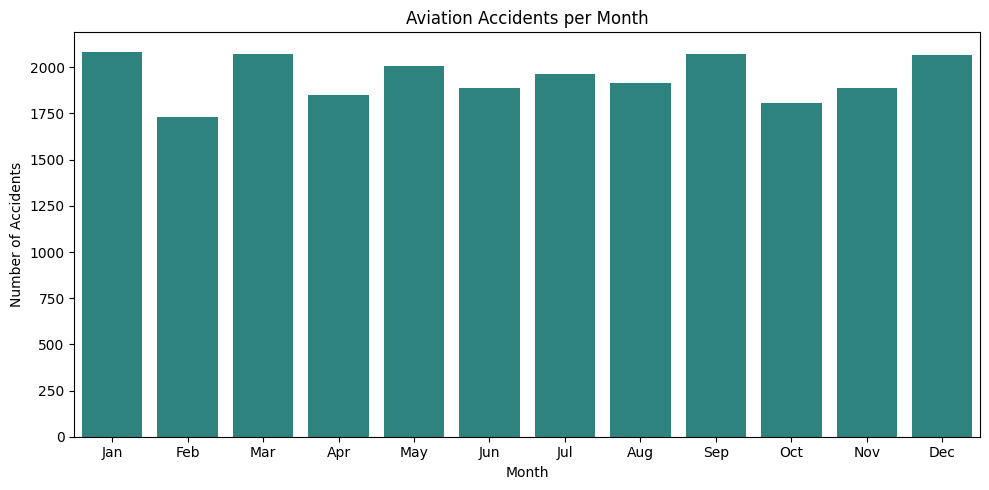

In [9]:
# finds information for "date" column in dataset
aviation_data = load_aviation_data()
aviation_data['date'] = pd.to_datetime(aviation_data['date'], errors='coerce')
valid_months_from_aviation_data = aviation_data['date'].dropna().dt.month

mean_month = valid_months_from_aviation_data.mean()
median_month = valid_months_from_aviation_data.median()
min_month = valid_months_from_aviation_data.min()
max_month = valid_months_from_aviation_data.max()

print(f"Mean month: {mean_month:.2f}")
print(f"Median month: {median_month}")
print(f"Minimum month: {min_month}")
print(f"Maximum month: {max_month}")
print(f"Range of months: {min_month} - {max_month}")

accidents_per_month = valid_months_from_aviation_data.value_counts().sort_index()

# Bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=accidents_per_month.index, y=accidents_per_month.values, color=sns.color_palette("viridis", 1)[0])

ax.set_title("Aviation Accidents per Month")
ax.set_xlabel("Month")
ax.set_ylabel("Number of Accidents")
ax.set_xticks(range(0, 12))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.tight_layout()
plt.show()

In [10]:
# Calculate number of missing elements in each column
missing_values_indicators = ['unknown', 'N/A', 0, -1, np.nan, '', ' ']

missingness_report = {}

for col in aviation_data.columns:
    nan_count = aviation_data[col].isna().sum()

    placeholder_count = 0
    for indicator in missing_values_indicators:
        if pd.api.types.is_numeric_dtype(aviation_data[col]) and isinstance(indicator, (int, float)):
            placeholder_count += (aviation_data[col] == indicator).sum()
        elif pd.api.types.is_string_dtype(aviation_data[col]) and isinstance(indicator, str):
            placeholder_count += (aviation_data[col] == indicator).sum()

    # Total missing for the column
    total_missing_in_col = nan_count + placeholder_count

    # Calculate percentage
    percentage_missing = (total_missing_in_col / len(aviation_data)) * 100
    missingness_report[col] = {
        'Missing Count': total_missing_in_col,
        'Percentage Missing': f'{percentage_missing:.2f}%'
    }

# Convert the report to a DataFrame for better display
missingness_df = pd.DataFrame.from_dict(missingness_report, orient='index')
missingness_df.index.name = 'Column'

display(missingness_df)

,Missing Count,Percentage Missing
Column,,
date,568,2.37%
type,34,0.14%
registration,1552,6.49%
operator,4,0.02%
fatalities,3982,16.65%
location,958,4.01%
country,0,0.00%
cat,0,0.00%
year,61,0.26%


In [11]:
# Cell 4: Number of occurrences per country
country_series = (
    aviation_data["country"]
    .astype("string")              # safe string dtype
    .str.strip()                   # remove leading/trailing spaces
    .fillna("Unknown country")     # treat NaN as Unknown
)

country_counts = country_series.value_counts()

filtered_country_counts = country_counts.drop("Unknown country", errors="ignore")

filtered_country_counts = filtered_country_counts.rename_axis("country")
display(filtered_country_counts)


,count
country,
USA,4371
Russia,1422
U.K.,837
Canada,822
India,698
...,...
Cook Isl.,1
Kosovo,1
Burundi,1


Mean number of occurrences: 99.88
Median number of occurrences: 23.0
Minimum number of occurrences: 1
Maximum number of occurrences: 4371
Range of occurrences: 1 - 4371


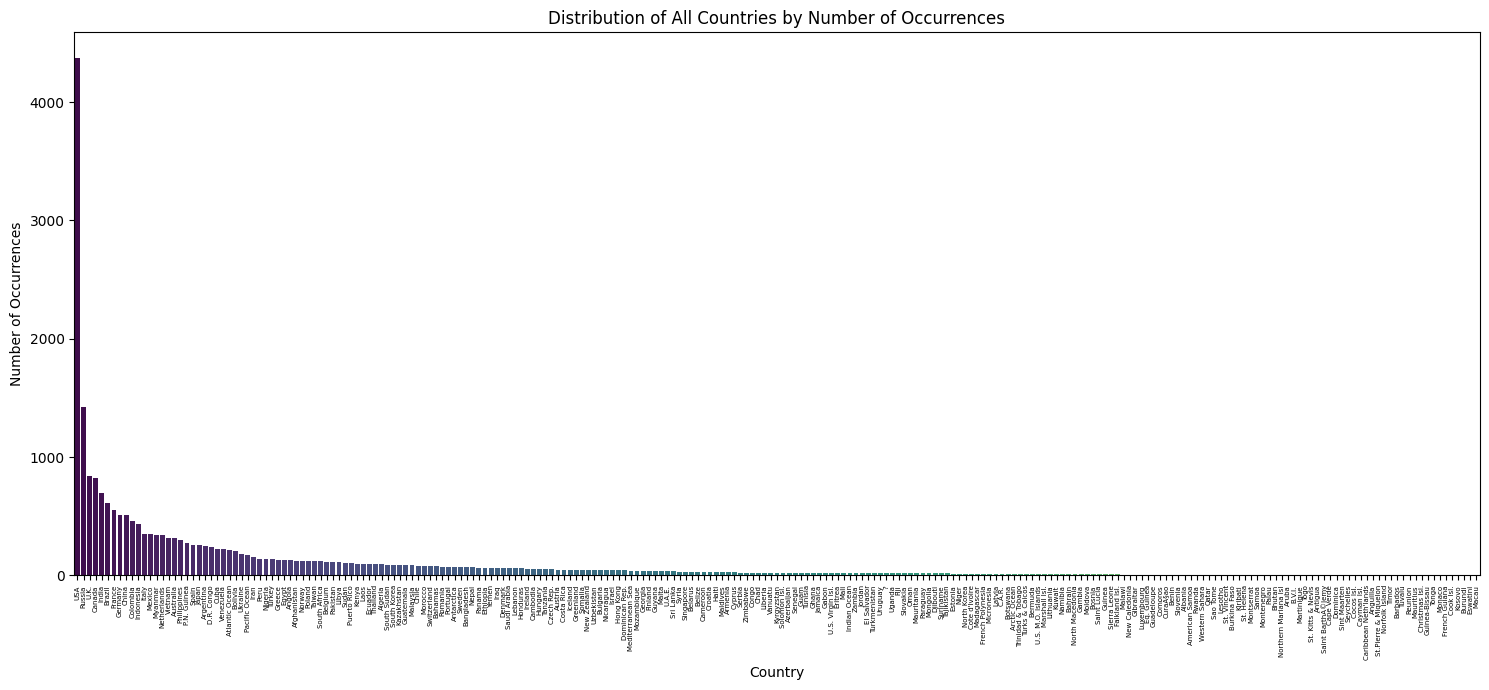

In [12]:
# Calculate mean, median, min, and max for the number of occurrences of countries
mean_occurrences = filtered_country_counts.mean()
median_occurrences = filtered_country_counts.median()
min_occurrences = filtered_country_counts.min()
max_occurrences = filtered_country_counts.max()

print(f"Mean number of occurrences: {mean_occurrences:.2f}")
print(f"Median number of occurrences: {median_occurrences}")
print(f"Minimum number of occurrences: {min_occurrences}")
print(f"Maximum number of occurrences: {max_occurrences}")
print(f"Range of occurrences: {min_occurrences} - {max_occurrences}")

plt.figure(figsize=(15, 7))
sns.barplot(x=filtered_country_counts.index, y=filtered_country_counts.values, hue=filtered_country_counts.index, palette='viridis', legend=False)
plt.title('Distribution of All Countries by Number of Occurrences')
plt.xlabel('Country')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.show()

,count
cat,
A1,17396
A2,2478
C1,1185
H2,1051
O1,1013
U1,588
C2,84
O2,65
H1,42


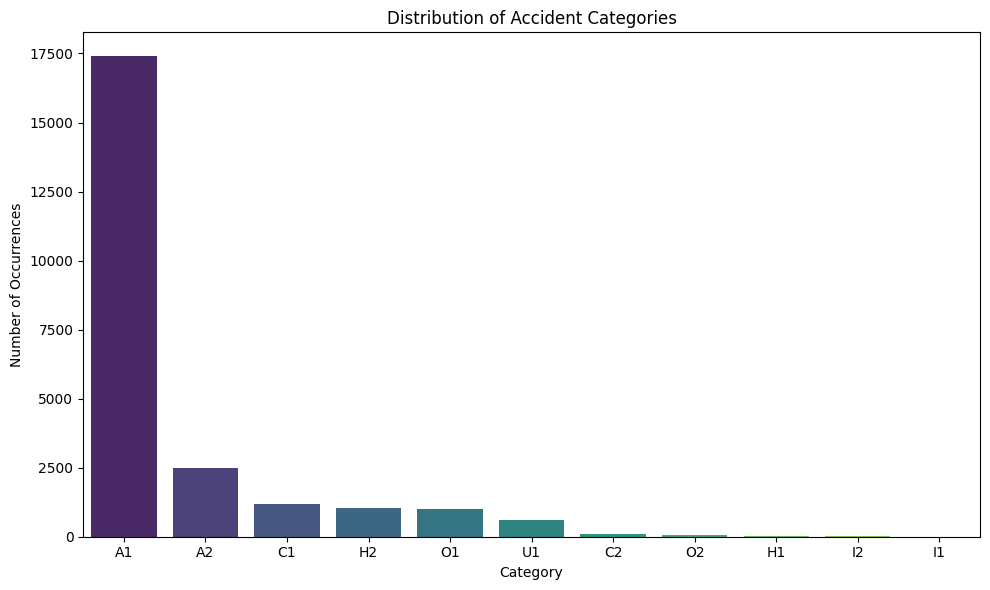

In [13]:
cat_counts = aviation_data['cat'].value_counts()
display(cat_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=cat_counts.index, y=cat_counts.values, hue=cat_counts.index, palette="viridis", legend=False)
plt.title('Distribution of Accident Categories')
plt.xlabel('Category')
plt.ylabel('Number of Occurrences')
plt.tight_layout()
plt.show()

Total rows with valid date+country: 23349
Rows used for season (N or S only): 21344
Excluded (Mixed/Equatorial): 2005


,count
season,
Winter,5309
Spring,5418
Summer,5360
Fall,5257


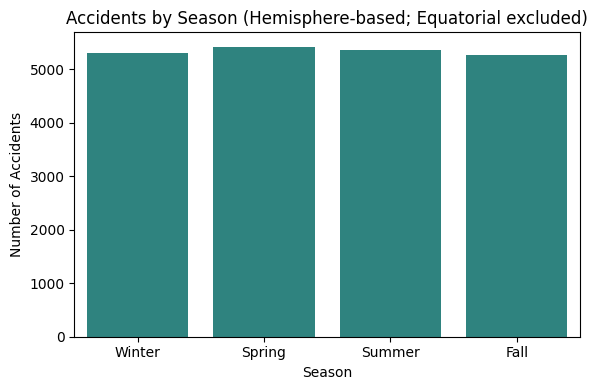

In [14]:
df = aviation_data.dropna(subset=["date", "country"]).copy()
df["month"] = df["date"].dt.month

# Countries where the equator crosses land (can’t infer hemisphere from country alone)
equatorial = {
    "Ecuador", "Colombia", "Brazil", "Sao Tome", "Sao Tome and Principe",
    "Gabon", "Congo", "D.R. Congo", "Congo (Kinshasa)", "Congo (Brazzaville)",
    "Uganda", "Kenya", "Somalia", "Indonesia"
}

# Mostly Southern Hemisphere countries (for a hemisphere-proxy)
southern = {
    "Australia", "New Zealand", "South Africa", "Argentina", "Chile", "Uruguay", "Paraguay",
    "Bolivia", "Peru", "Namibia", "Botswana", "Zimbabwe", "Zambia", "Mozambique", "Madagascar",
    "Angola", "Lesotho", "Eswatini"
}

def assign_hemisphere(country: str) -> str:
    if pd.isna(country):
        return "Unknown"
    if country in equatorial:
        return "Mixed/Equatorial"
    if country in southern:
        return "S"
    return "N"  # default

df["hemisphere"] = df["country"].apply(assign_hemisphere)

def season_from_month_and_hemi(month: int, hemi: str) -> str:
    # Northern meteorological seasons
    if month in (12, 1, 2):
        season = "Winter"
    elif month in (3, 4, 5):
        season = "Spring"
    elif month in (6, 7, 8):
        season = "Summer"
    else:
        season = "Fall"

    if hemi == "S":
        flip = {"Winter": "Summer", "Spring": "Fall", "Summer": "Winter", "Fall": "Spring"}
        return flip[season]
    if hemi == "Mixed/Equatorial":
        return "Mixed/Equatorial"
    return season

df["season"] = df.apply(lambda r: season_from_month_and_hemi(r["month"], r["hemisphere"]), axis=1)

# --- season analysis (exclude equatorial/mixed) ---
season_df = df[df["hemisphere"].isin(["N", "S"])].copy()

print("Total rows with valid date+country:", len(df))
print("Rows used for season (N or S only):", len(season_df))
print("Excluded (Mixed/Equatorial):", (df["hemisphere"] == "Mixed/Equatorial").sum())

season_counts = season_df["season"].value_counts().reindex(["Winter", "Spring", "Summer", "Fall"])
display(season_counts)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=season_counts.index, y=season_counts.values, color=sns.color_palette("viridis", 1)[0])
plt.title("Accidents by Season (Hemisphere-based; Equatorial excluded)")
plt.xlabel("Season")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()
